In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from keras.utils import image_dataset_from_directory

2025-12-09 09:46:28.017525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765273588.175855      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765273588.232872      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/kaggle/input/face-expression-recognition-dataset/images/train/disgust/10112.jpg")
print(img.shape) 

(48, 48, 3)


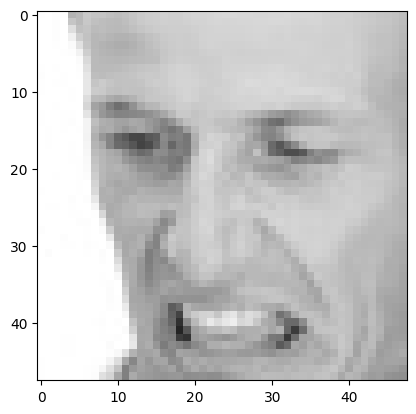

In [3]:
plt.imshow(img)

In [4]:
import numpy as np

same = np.all(img[:,:,0] == img[:,:,1]) and np.all(img[:,:,1] == img[:,:,2])
print(same)

True


In [5]:
train_data=image_dataset_from_directory(
    "/kaggle/input/face-expression-recognition-dataset/images/train",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=42,

)

val_data=image_dataset_from_directory(
    "/kaggle/input/face-expression-recognition-dataset//images/validation",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=42,
    
)

Found 28821 files belonging to 7 classes.


I0000 00:00:1765273637.583370      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 7066 files belonging to 7 classes.


In [6]:
def process(image, label):
    image=tf.cast(image, tf.float32)/255
    return image, label

train_data=train_data.map(process)
val_data=val_data.map(process)

In [7]:
data_augmentation=Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
], name="data_augmentation_pipeline")

In [8]:
model = Sequential()

model.add(data_augmentation)
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation_pipeline      │ ?                      │   0 (unbuilt) │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_data, batch_size=32, epochs=50, validation_data=val_data)

Epoch 1/50


I0000 00:00:1765273652.250493      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


901/901 ━━━━━━━━━━━━━━━━━━━━ 71s 72ms/step - accuracy: 0.2338 - loss: 2.0326 - val_accuracy: 0.2729 - val_loss: 1.7953
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2746 - loss: 1.7740 - val_accuracy: 0.3462 - val_loss: 1.6906
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2954 - loss: 1.7088 - val_accuracy: 0.3736 - val_loss: 1.6002
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3166 - loss: 1.6692 - val_accuracy: 0.3731 - val_loss: 1.5560
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3358 - loss: 1.6364 - val_accuracy: 0.3746 - val_loss: 1.5830
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3434 - loss: 1.6226 - val_accuracy: 0.4263 - val_loss: 1.4537
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3585 - loss: 1.5889 - val_accuracy: 0.2594 - val_loss: 1.8882
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3613 - loss: 1.5849 - val_accurac

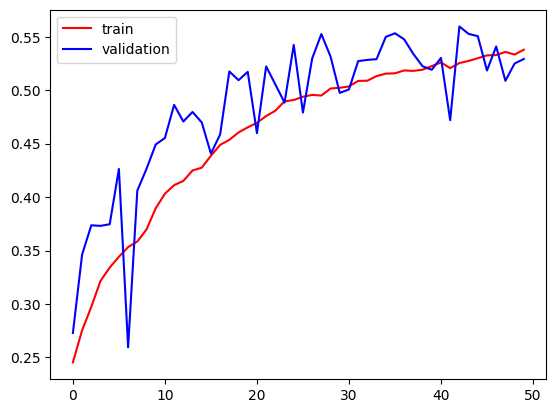

In [12]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

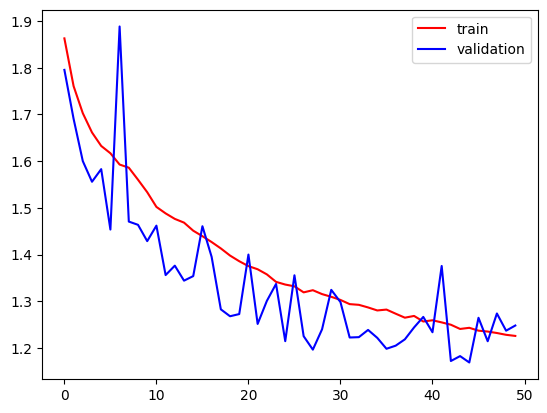

In [13]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [14]:
model.save("base.h5")